In [1]:
# importing required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()


Saving SalaryData_Train(1).csv to SalaryData_Train(1).csv


In [3]:
salary_train=pd.read_csv("SalaryData_Train(1).csv")

In [4]:
salary_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
salary_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [6]:
salary_train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

In [7]:
salary_train1=salary_train.drop_duplicates()

In [8]:
salary_train1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [9]:
salary_train1['relationship'].value_counts()

 Husband           10809
 Not-in-family      7115
 Own-child          3655
 Unmarried          3086
 Wife               1366
 Other-relative      872
Name: relationship, dtype: int64

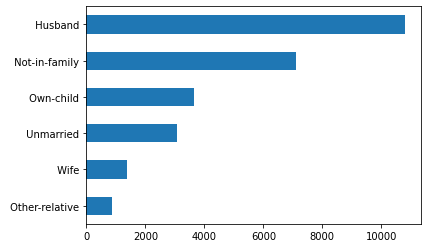

In [10]:
salary_train1.relationship.value_counts().sort_values().plot(kind = 'barh')

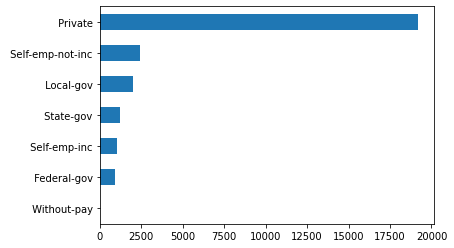

In [11]:
salary_train1.workclass.value_counts().sort_values().plot(kind = 'barh')

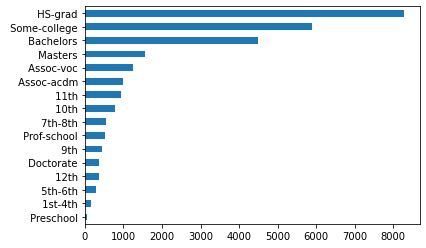

In [12]:
salary_train1.education.value_counts().sort_values().plot(kind = 'barh')

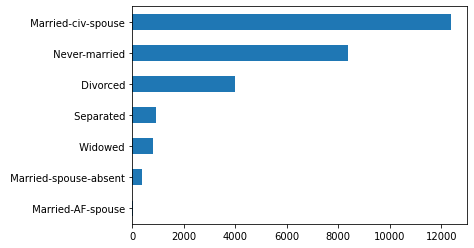

In [13]:
salary_train1.maritalstatus.value_counts().sort_values().plot(kind = 'barh')


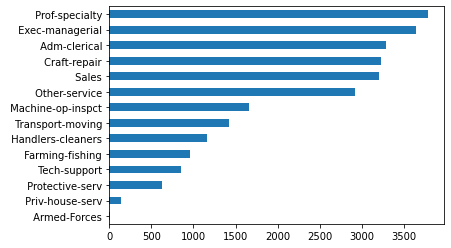

In [14]:
salary_train1.occupation.value_counts().sort_values().plot(kind = 'barh')



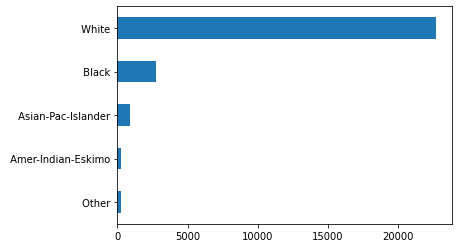

In [15]:
salary_train1.race.value_counts().sort_values().plot(kind = 'barh')



In [16]:
from google.colab import files 
uploaded=files.upload()

Saving SalaryData_Test(1).csv to SalaryData_Test(1).csv


In [17]:
salary_test=pd.read_csv("SalaryData_Test(1).csv")

In [18]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [19]:
salary_test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

In [20]:
salary_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
salary_test.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
15055    False
15056    False
15057    False
15058    False
15059    False
Length: 15060, dtype: bool

In [22]:
categorical = [var for var in salary_train.columns if
salary_train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [23]:
numerical = [var_1 for var_1 in salary_train.columns if
salary_train[var_1].dtype=='int64']

In [24]:
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :\n\n', numerical)

There are 5 numerical variables

The numerical variables are :

 ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


Text(0.5, 1.0, 'Frequency distribution of Salary variable')

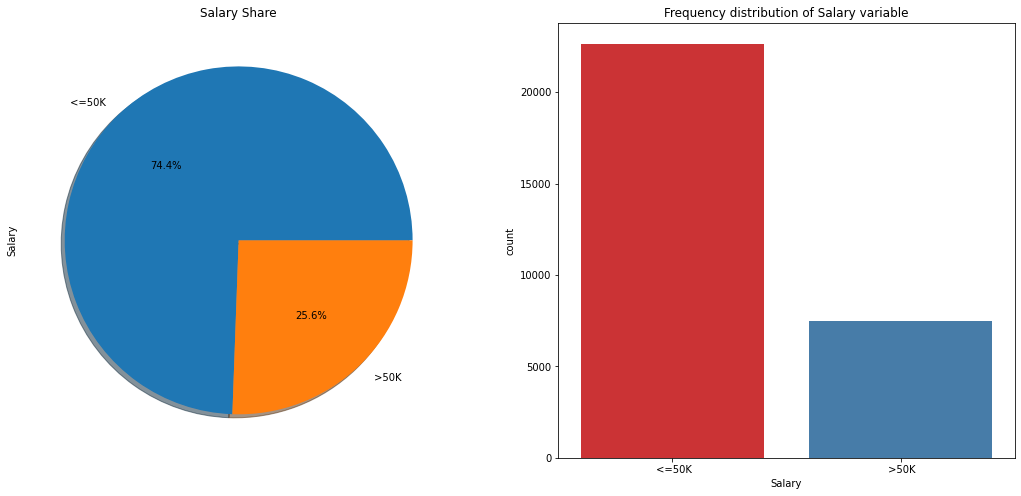

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(18,8))
ax[0] =salary_train1['Salary'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Salary Share')
#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Salary", data=salary_train, palette="Set1")
ax[1].set_title("Frequency distribution of Salary variable")

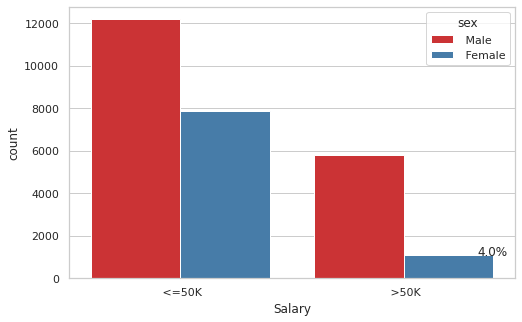

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(salary_train1))
ax = sns.countplot(x="Salary", hue="sex", data=salary_train1,palette='Set1')
#plt.title('No. of Smokers', fontsize=20)
for p in ax.patches:percentage = '{:.1f}%'.format(100 * p.get_height()/total)
x = p.get_x() + p.get_width()
y = p.get_height()
ax.annotate(percentage, (x, y),ha='center')
plt.show()

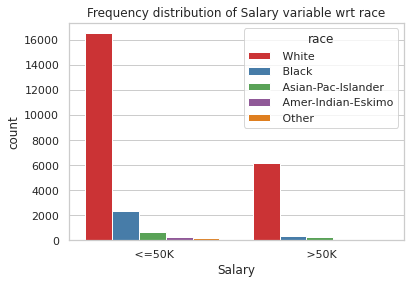

In [27]:
#f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Salary", hue="race", data=salary_train1,palette="Set1")
ax.set_title("Frequency distribution of Salary variable wrt race")
plt.show()

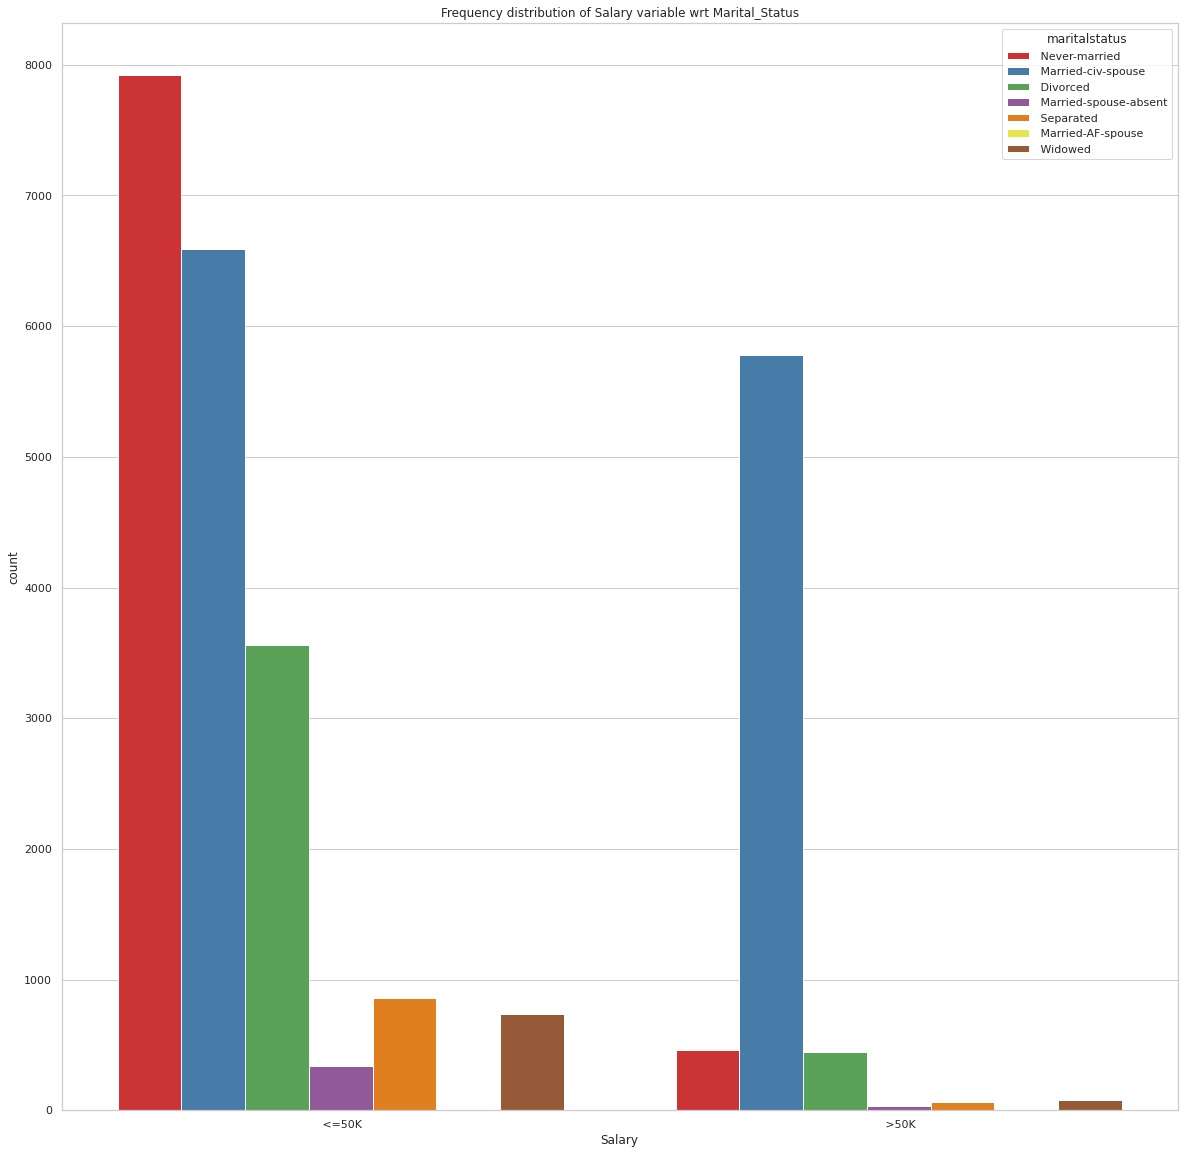

In [28]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.countplot(x="Salary", hue="maritalstatus", data=salary_train1,palette="Set1")
ax.set_title("Frequency distribution of Salary variable wrt Marital_Status")
plt.show()

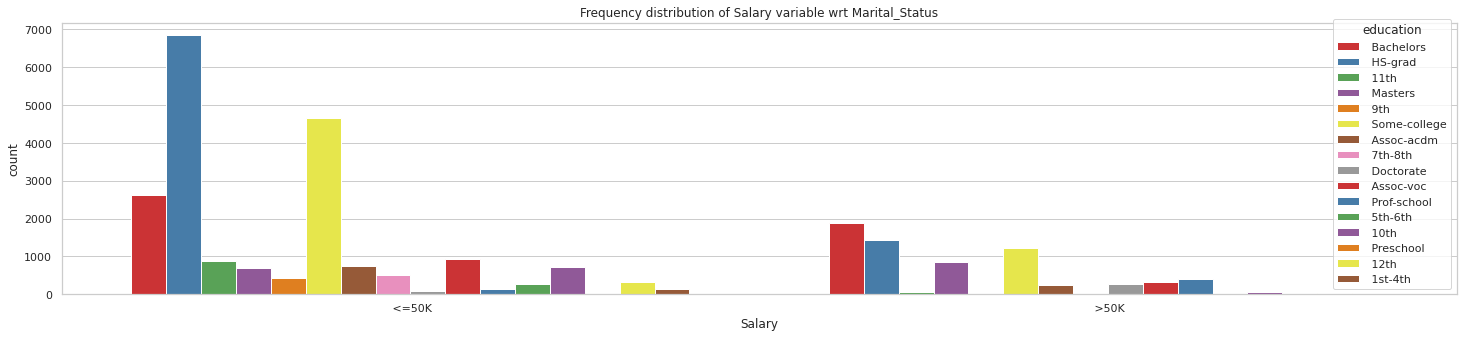

In [29]:
f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="Salary", hue="education", data=salary_train1,palette="Set1")
ax.set_title("Frequency distribution of Salary variable wrt Marital_Status")
plt.show()

In [30]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
salary_train1.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [31]:
salary_train1['workclass']= le.fit_transform(salary_train1['workclass'])
salary_train1['education']= le.fit_transform(salary_train1['education'])
salary_train1['maritalstatus']= le.fit_transform(salary_train1['maritalstatus'])
salary_train1['occupation']= le.fit_transform(salary_train1['occupation'])
salary_train1['relationship']= le.fit_transform(salary_train1['relationship'])
salary_train1['sex']= le.fit_transform(salary_train1['sex'])
salary_train1['native']= le.fit_transform(salary_train1['native'])
salary_train1['Salary']= le.fit_transform(salary_train1['Salary'])
salary_train1['race']= le.fit_transform(salary_train1['race'])

In [32]:
salary_test['workclass']= le.fit_transform(salary_test['workclass'])
salary_test['education']= le.fit_transform(salary_test['education'])
salary_test['maritalstatus']=le.fit_transform(salary_test['maritalstatus'])
salary_test['occupation']= le.fit_transform(salary_test['occupation'])
salary_test['relationship']=le.fit_transform(salary_test['relationship'])
salary_test['race']= le.fit_transform(salary_test['race'])
salary_test['sex']= le.fit_transform(salary_test['sex'])
salary_test['native']=le.fit_transform(salary_test['native'])
salary_test['Salary']= le.fit_transform(salary_test['Salary'])

In [33]:
salary_train1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [34]:
salary_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [35]:
train_X = salary_train1.iloc[:, 1:]
train_y = salary_train1.iloc[:, 0]
test_X = salary_test.iloc[:, 1:]
test_y = salary_test.iloc[:, 0]

#Scaling the variables

In [36]:
from sklearn.preprocessing import scale
trainX= scale(train_X)
testX=scale(test_X)
trainX

array([[ 2.79138305, -0.32451893,  1.08991936, ..., -0.09432316,
         0.28241436, -0.58617818],
       [ 1.78815577, -0.32451893,  1.08991936, ..., -2.28112073,
         0.28241436, -0.58617818],
       [-0.2182988 ,  0.19299932, -0.43673666, ..., -0.09432316,
         0.28241436, -0.58617818],
       ...,
       [-0.2182988 , -0.84203718,  0.70825535, ..., -0.25630817,
         0.28241436, -0.58617818],
       [-0.2182988 ,  0.19299932, -0.43673666, ..., -0.09432316,
         0.28241436, -0.58617818],
       [ 0.78492849,  0.19299932, -0.43673666, ..., -0.09432316,
         0.28241436,  1.70596593]])

#MODEL BUILDING
SUPPORT VECTOR MACHINE

In [37]:

# kernel = linear
model_rbf = SVC(kernel = "linear")
model_rbf.fit(trainX,train_y)
pred_test_linear = model_rbf.predict(testX)
np.mean(pred_test_linear==test_y)

0.06049136786188579

In [38]:
# kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(trainX,train_y)
pred_test_poly = model_poly.predict(testX)
np.mean(pred_test_poly==test_y)

0.05657370517928287

In [39]:
# kernel = rbf

model_rbf = SVC(kernel = "rbf")
model_rbf.fit(trainX,train_y)
pred_test_rbf = model_rbf.predict(testX)
np.mean(pred_test_rbf==test_y)

0.06274900398406374

In [40]:
# kernel = sigmoid
model_rbf = SVC(kernel = "sigmoid")
model_rbf.fit(trainX,train_y)
pred_test_sigmoid = model_rbf.predict(testX)
np.mean(pred_test_sigmoid==test_y)


0.05039840637450199

ACCURACY IS GOOD  WHEN WE USE KERNEL RBF TRICK